In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [2]:
df = pd.read_csv('/content/house_prices_records.csv')

In [3]:
print(df.head())
print(df.info())
print(df.describe())

   1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       NaN           NaN           No         216          ALQ   
4      1145       NaN           4.0           Av         655          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   
3        540            NaN         642          Unf  ...         60.0   
4        490            0.0         836          RFn  ...         84.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.

In [4]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
       'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea',
       'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
       'SalePrice'],
      dtype='object')

In [6]:
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

EnclosedPorch    1324
WoodDeckSF       1305
LotFrontage       259
GarageFinish      235
BsmtFinType1      145
BedroomAbvGr       99
2ndFlrSF           86
GarageYrBlt        81
BsmtExposure       38
MasVnrArea          8
dtype: int64


In [7]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')

In [8]:
#convert categorical features
categorical_cols = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1stFlrSF          1460 non-null   int64  
 1   2ndFlrSF          1374 non-null   float64
 2   BedroomAbvGr      1361 non-null   float64
 3   BsmtFinSF1        1460 non-null   int64  
 4   BsmtUnfSF         1460 non-null   int64  
 5   EnclosedPorch     136 non-null    float64
 6   GarageArea        1460 non-null   int64  
 7   GarageYrBlt       1460 non-null   float64
 8   GrLivArea         1460 non-null   int64  
 9   LotArea           1460 non-null   int64  
 10  LotFrontage       1460 non-null   float64
 11  MasVnrArea        1460 non-null   float64
 12  OpenPorchSF       1460 non-null   int64  
 13  OverallCond       1460 non-null   int64  
 14  OverallQual       1460 non-null   int64  
 15  TotalBsmtSF       1460 non-null   int64  
 16  WoodDeckSF        155 non-null    float64


EDA

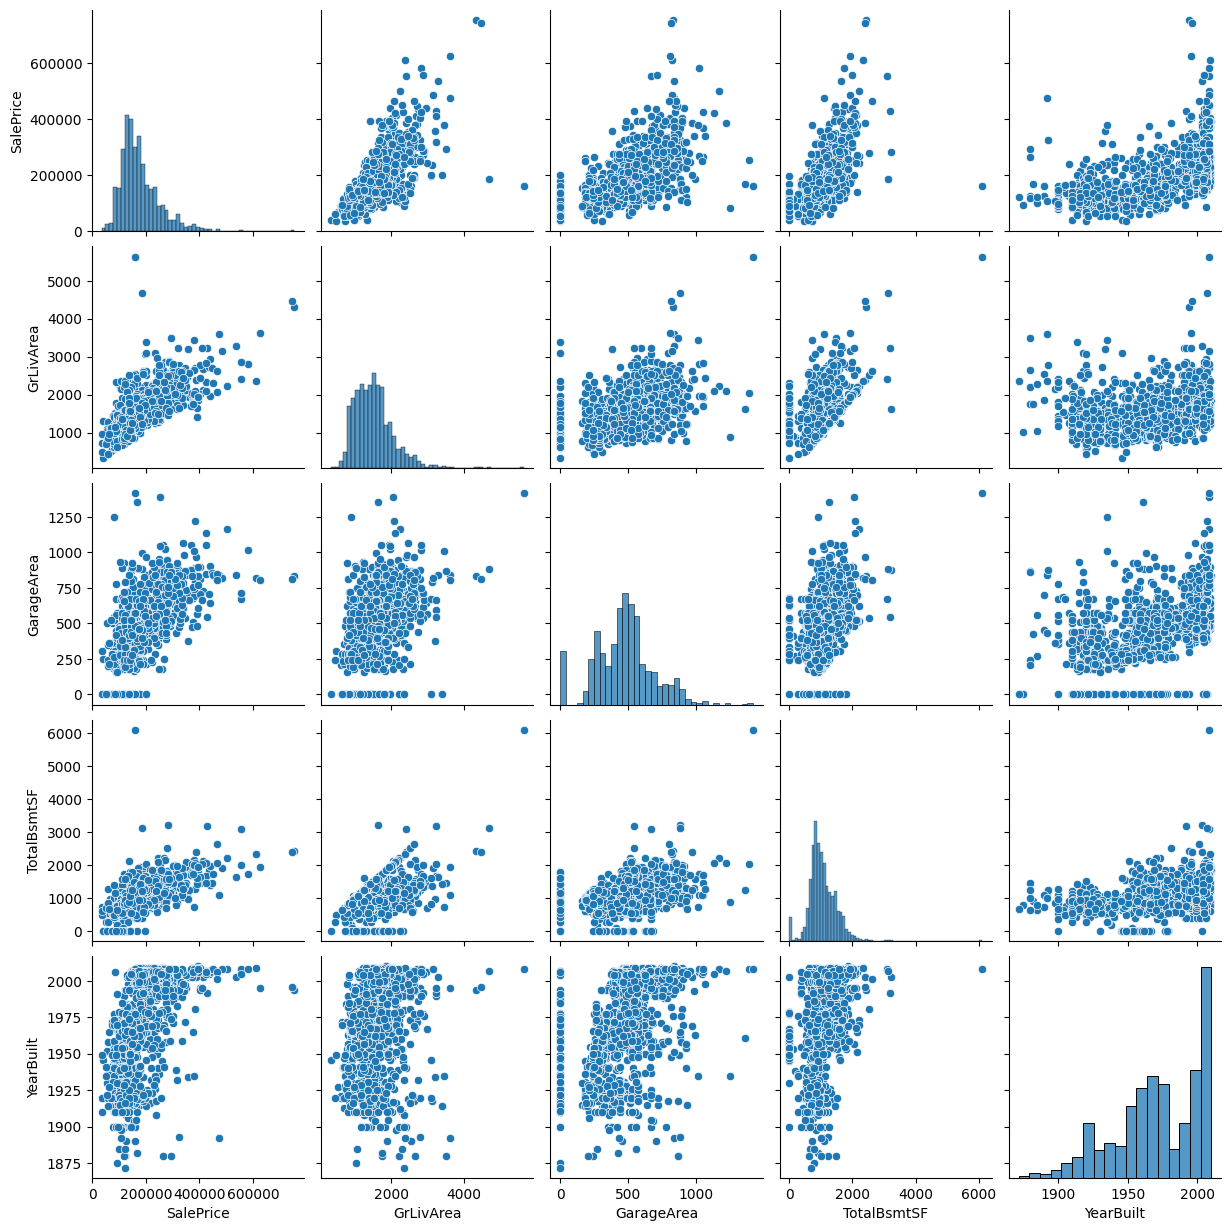

In [10]:
sns.pairplot(df[['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt']])
plt.show()

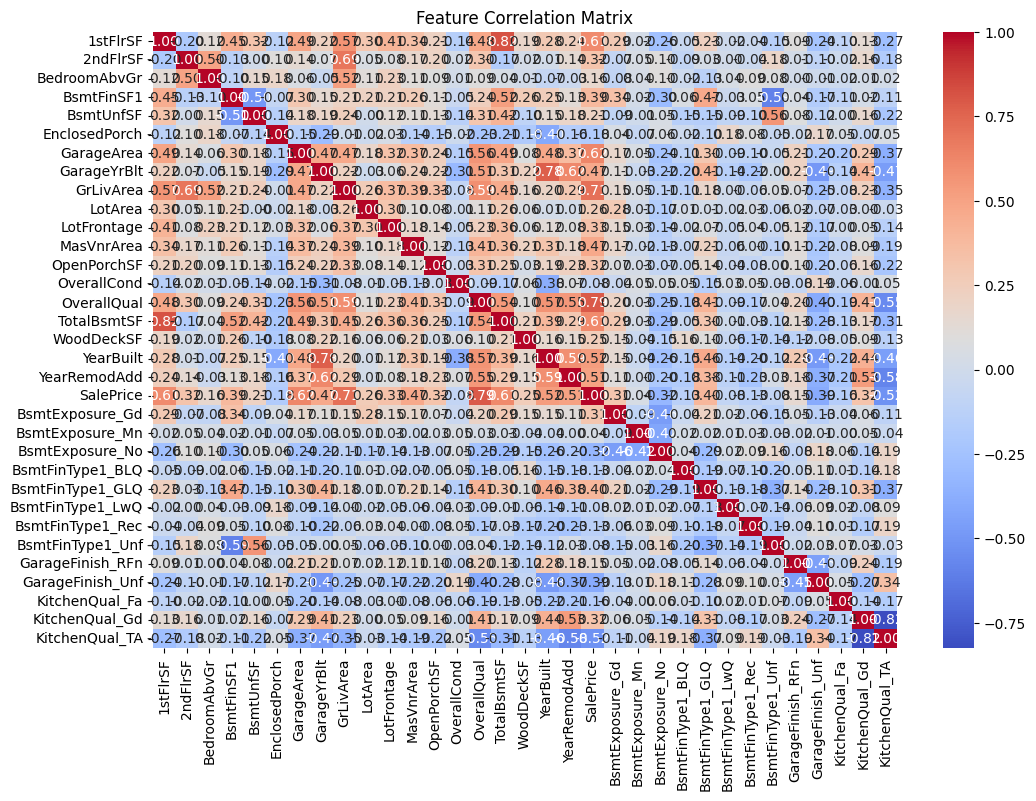

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

Feature Engg

In [21]:
features = ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'GarageArea', 'GrLivArea',
            'KitchenQual_TA', 'LotArea', 'OverallCond', 'OverallQual',
            'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']

x = df[features]
y = df['SalePrice']

x_train,x_test,y_train,y_test =train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Model

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost':XGBRegressor(objective='reg:squarederror', random_state=42)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}")


Linear Regression - MAE: 23391.394637399426, RMSE: 38036.950528581576, R2 Score: 0.8113757399055471
Random Forest - MAE: 19087.426439986953, RMSE: 29223.805565375456, R2 Score: 0.8886578238455309
XGBoost - MAE: 20795.079864083906, RMSE: 33417.91332387771, R2 Score: 0.8544055223464966


Feature Importance Visualization

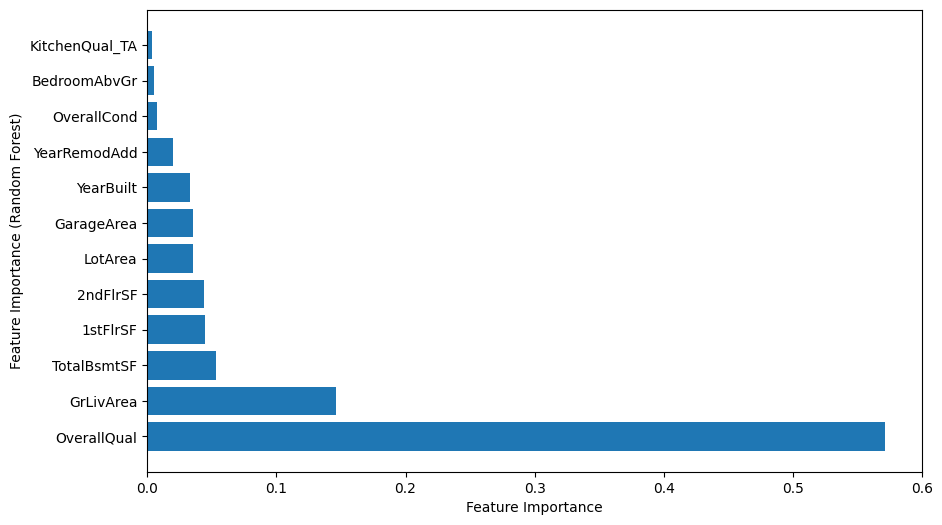

In [38]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

plt.figure(figsize=(10, 6))
importance = rf_model.feature_importances_
sorted_indices = np.argsort(importance)[::-1]
plt.barh(range(len(sorted_indices)), importance[sorted_indices], align="center")
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Importance (Random Forest)")
plt.show()
